In [ ]:
# EEG-Based Emotion Recognition using Deep Learning 
## Project Overview: Decoding Cognitive and Emotional States from Neural Signals

Loading dataset, please wait...
Starting model training...
Epoch 1/50


/Applications/miniconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8321 - loss: 0.4245 - val_accuracy: 0.9032 - val_loss: 0.3291
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9142 - loss: 0.2389 - val_accuracy: 0.9296 - val_loss: 0.1977
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9120 - loss: 0.2305 - val_accuracy: 0.9179 - val_loss: 0.2124
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9179 - loss: 0.1930 - val_accuracy: 0.9501 - val_loss: 0.1234
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9326 - loss: 0.1783 - val_accuracy: 0.9560 - val_loss: 0.1450
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9516 - loss: 0.1293 - val_accuracy: 0.9648 - val_loss: 0.1013
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9582 - loss: 0.1146 - val_accuracy: 0.9560 - val_loss: 0.1218
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1199 - val_accuracy: 0.9560 - val_loss: 0.1131
Epo

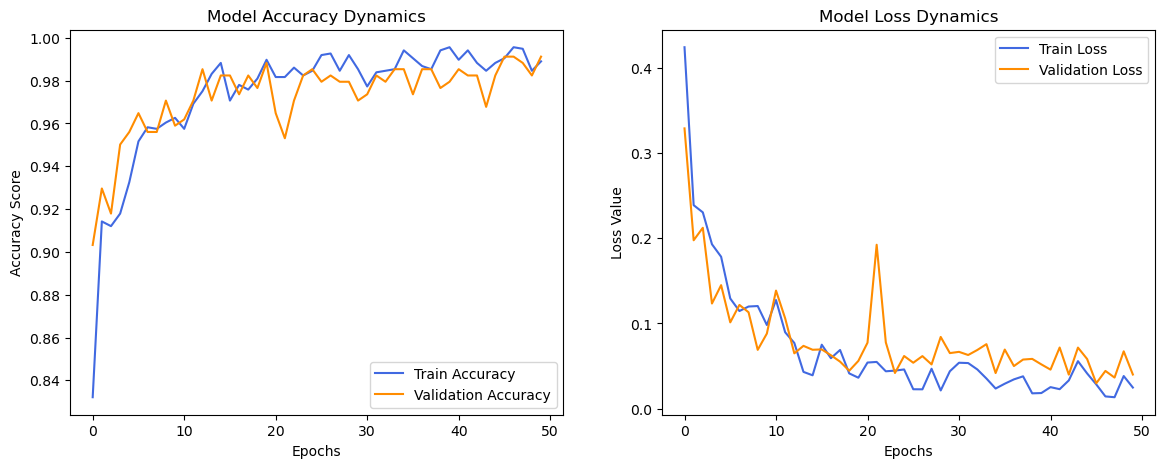


✅ Project Execution Successful!
🚀 Final Test Accuracy: 99.06%
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


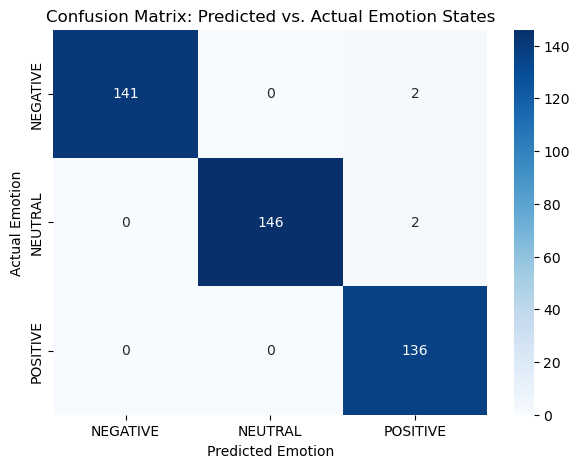

In [4]:
### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# 1. DATA LOADING
print("Loading dataset, please wait...")
df = pd.read_csv('emotions.csv')

# 2. PREPROCESSING
# Encode categorical labels: NEGATIVE=0, NEUTRAL=1, POSITIVE=2
le = LabelEncoder()
df['label'] = le.fit_transform(df['label']) 

X = df.drop('label', axis=1)
y = df['label']

# Split data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling: Essential for Deep Learning performance and convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. DEEP LEARNING MODEL ARCHITECTURE
# Designed with BatchNormalization and Dropout to ensure robust learning and prevent overfitting
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(), 
    Dropout(0.5),         
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') # Softmax for 3-class emotion classification
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# 4. MODEL TRAINING
print("Starting model training...")
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, # Monitoring performance on unseen validation data
                    verbose=1)


# 5. VISUALIZATION OF RESULTS
plt.figure(figsize=(14, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='royalblue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.title('Model Accuracy Dynamics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='royalblue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.title('Model Loss Dynamics')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# 6. FINAL EVALUATION
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Project Execution Successful!")
print(f"🚀 Final Test Accuracy: {test_acc*100:.2f}%")

# Confusion Matrix for Error Analysis
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix: Predicted vs. Actual Emotion States')
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.show()^3^

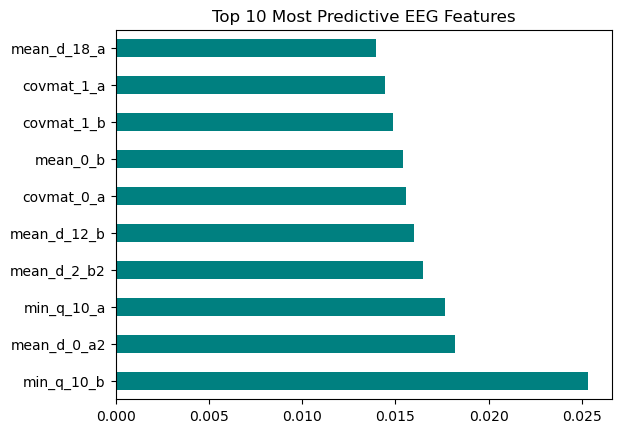

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# most important features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Most Predictive EEG Features')
plt.show()

/var/folders/4_/m3j3y85x2rdf6l7slyzrvwvr0000gn/T/ipykernel_13084/2942233595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='min_q_10_b', data=df, palette="Set2")


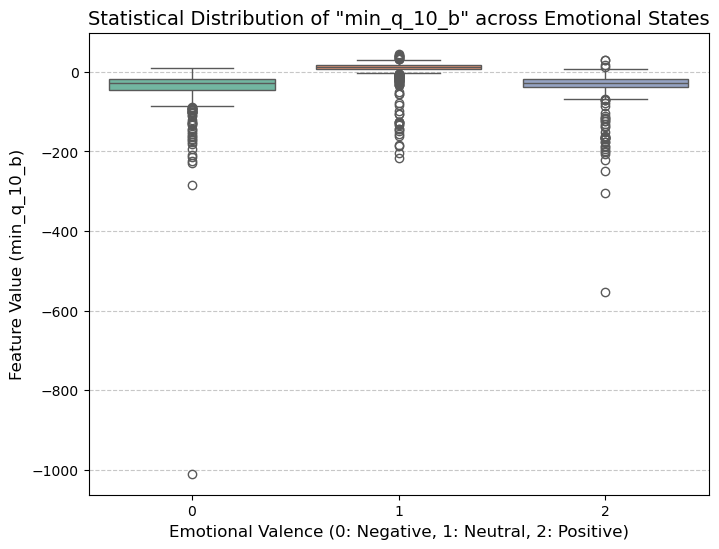

In [8]:
# Statistical Analysis: Distribution of the Top Feature across Emotion Classes
plt.figure(figsize=(8,6))
sns.boxplot(x='label', y='min_q_10_b', data=df, palette="Set2")

# Adding professional academic labels
plt.title('Statistical Distribution of "min_q_10_b" across Emotional States', fontsize=14)
plt.xlabel('Emotional Valence (0: Negative, 1: Neutral, 2: Positive)', fontsize=12)
plt.ylabel('Feature Value (min_q_10_b)', fontsize=12)
plt.grid(axis='y', lin3estyle='--', alpha=0.7)
plt.show()